In [33]:
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import numpy as np
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
from mpl_toolkits.basemap import Basemap, cm


In [34]:
home = Path.home()
data_dir = home / Path("Desktop\Edumacation\GEOB 402\FINAL PROJECT\AOD Data")
hdf_files=list(data_dir.glob("MOD04_L2*208*.hdf"))
file_name = str(data_dir / Path(hdf_files[0]))
print(f'reading {file_name}')
the_file = SD(file_name, SDC.READ)

datasets_dict = the_file.datasets()
for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

# stars='*'*50
# print((f'\n{stars}\nnumber of datasets, number of attributes'
#        f'={the_file.info()}\n{stars}\n'
#        f'\nHere is the help file for the info funtion:\n'))
# help(SD.info)

reading C:\Users\Pearl\Desktop\Edumacation\GEOB 402\FINAL PROJECT\AOD Data\MOD04_L2.A2017208.1930.061.2017316234525.hdf
0 Longitude
1 Latitude
2 Scan_Start_Time
3 Solar_Zenith
4 Solar_Azimuth
5 Sensor_Zenith
6 Sensor_Azimuth
7 Scattering_Angle
8 Land_sea_Flag
9 Aerosol_Cldmask_Land_Ocean
10 Cloud_Pixel_Distance_Land_Ocean
11 Land_Ocean_Quality_Flag
12 Optical_Depth_Land_And_Ocean
13 Image_Optical_Depth_Land_And_Ocean
14 Average_Cloud_Pixel_Distance_Land_Ocean
15 Aerosol_Type_Land
16 Fitting_Error_Land
17 Surface_Reflectance_Land
18 Corrected_Optical_Depth_Land
19 Corrected_Optical_Depth_Land_wav2p1
20 Optical_Depth_Ratio_Small_Land
21 Number_Pixels_Used_Land
22 Mean_Reflectance_Land
23 STD_Reflectance_Land
24 Mass_Concentration_Land
25 Aerosol_Cloud_Fraction_Land
26 Quality_Assurance_Land
27 Solution_Index_Ocean_Small
28 Solution_Index_Ocean_Large
29 Effective_Optical_Depth_Best_Ocean
30 Effective_Optical_Depth_Average_Ocean
31 Optical_Depth_Small_Best_Ocean
32 Optical_Depth_Small_Aver


The valid range of values is:  -0.1  to  5.0 
The average is:  0.076 
The standard deviation is:  0.085
The range of latitude in this file is:  34.31994  to  55.733788 degrees 
The range of longitude in this file is:  -142.88254  to  -107.660675  degrees


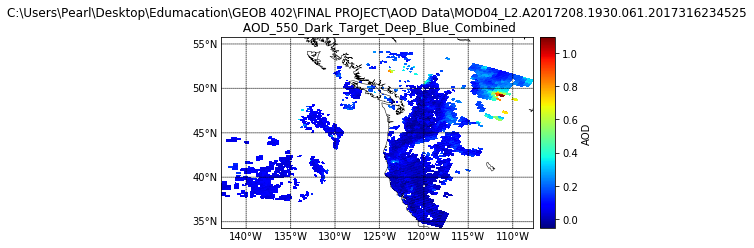

In [38]:
# Get lat and lon info
lat = the_file.select('Latitude')
latitude = lat[:]
min_lat=latitude.min()
max_lat=latitude.max()
lon = the_file.select('Longitude')
longitude = lon[:]
min_lon=longitude.min()
max_lon=longitude.max()

#get AOD SDS, or exit if it doesn't find the SDS in the file
SDS_NAME='AOD_550_Dark_Target_Deep_Blue_Combined'

try:
    sds=the_file.select(SDS_NAME)
except:
    print('Ya goof, your MODIS hdf file does not contain the SDS:',SDS_NAME,'. Fix this.')
    sys.exit()
    
    
#get scale factor for AOD SDS
attributes=sds.attributes()
scale_factor=attributes['scale_factor']


#get valid range for AOD SDS
range=sds.getrange()
min_range=min(range)
max_range=max(range)

#get SDS data
data=sds.get()


#get data within valid range
valid_data=data.ravel()
valid_data=[x for x in valid_data if x>=min_range]
valid_data=[x for x in valid_data if x<=max_range]
valid_data=np.asarray(valid_data)


#scale the valid data
valid_data=valid_data*scale_factor


#find the average
average=sum(valid_data)/len(valid_data)


#find the standard deviation
stdev=np.std(valid_data)


#print information
print('\nThe valid range of values is: ',round(min_range*scale_factor,3), ' to ',round(max_range*scale_factor,3),'\nThe average is: ',round(average,3),'\nThe standard deviation is: ',round(stdev,3))
print('The range of latitude in this file is: ',min_lat,' to ',max_lat, 'degrees \nThe range of longitude in this file is: ',min_lon, ' to ',max_lon,' degrees')

#Asks user if they would like to see a map
# is_map=str(input('\nWould you like to create a map of this data? Please enter Y or N \n'))


# #if user would like a map, view it
# if is_map == 'Y' or is_map == 'y':
attrs = sds.attributes(full=1)
fillvalue=attrs['_FillValue']


# # fillvalue[0] is the attribute value (-9999)
fv = fillvalue[0]


# #turn fillvalues to NaN
data=data.astype(float)
data[data == fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))
m = Basemap(projection='cyl', resolution='l', llcrnrlat=min_lat, urcrnrlat = max_lat, llcrnrlon=min_lon, urcrnrlon = max_lon)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 5.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 0, 1])
x, y = m(longitude, latitude)
m.pcolormesh(x, y, data*scale_factor, cmap=plt.cm.jet)
plt.autoscale()


# #create colorbar
cb = m.colorbar()


# #label colorboar
cb.set_label('AOD')

# #title the plot
plotTitle=file_name[:-4]
plt.title('{0}\n {1}'.format(plotTitle, SDS_NAME))
fig = plt.gcf()
# Show the plot window.
plt.show()


# #once you close the map it asks if you'd like to save it
# is_save=str(input('\nWould you like to save this map? Please enter Y or N \n'))
# if is_save == 'Y' or is_save == 'y':

#     #saves as a png if the user would like
# pngfile = '{0}.png'.format(plotTitle)
# fig.savefig(pngfile)
# print('\nAll valid files have been processed.')